# 01wk-2: xxxx

최규빈  
2025-03-10

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/01wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
# {{<video https://youtu.be/playlist?list=PLQqh36zP38-w2wjg7vQJHPP89wWGSq-MZ&si=J0lxSPEePOD-5BOL >}}

# 2. Imports

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

# 3. 회귀모형 – intro

## A. 아이스 아메리카노 (가짜자료)

`-` 카페주인인 박혜원씨는 온도와 아이스아메리카노 판매량이 관계가 있다는
것을 알았다. 구체적으로는

> “온도가 높아질 수록 (=날씨가 더울수록) 아이스아메리카노의 판매량이
> 증가”

한다는 사실을 알게 되었다. 이를 확인하기 위해서 아래와 같이 100개의
데이터를 모았다.

In [3]:
temp = [-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.6632]

In [4]:
sales= [-8.5420, -6.5767, -5.9496, -4.4794, -4.2516, -3.1326, -4.0239, -4.1862,
        -3.3403, -2.2027, -2.0262, -2.5619, -1.3353, -2.0466, -0.4664, -1.3513,
        -1.6472, -0.1089, -0.3071, -0.6299, -0.0438,  0.4163,  0.4166, -0.0943,
         0.2662,  0.4591,  0.8905,  0.8998,  0.6314,  1.3845,  0.8085,  1.2594,
         1.1211,  1.9232,  1.0619,  1.3552,  2.1161,  1.1437,  1.6245,  1.7639,
         1.6022,  1.7465,  0.9830,  1.7824,  2.1116,  2.8621,  2.1165,  1.5226,
         2.5572,  2.8361,  3.3956,  2.0679,  2.8140,  3.4852,  3.6059,  2.5966,
         2.8854,  3.9173,  3.6527,  4.1029,  4.3125,  3.4026,  3.2180,  4.5686,
         4.3772,  4.3075,  4.4895,  4.4827,  5.3170,  5.4987,  5.4632,  6.0328,
         5.2842,  5.0539,  5.4538,  6.0337,  5.7250,  5.7587,  6.2020,  6.5992,
         6.4621,  6.5140,  6.6846,  7.3497,  8.0909,  7.0794,  6.8667,  7.4229,
         7.2544,  7.1967,  9.5006,  9.0339,  7.4887,  9.0759, 11.0946, 10.3260,
        12.2665, 13.0983, 12.5468, 13.8340]

여기에서 `temp`는 평균기온이고, `sales`는 아이스아메리카노 판매량이다.
평균기온과 판매량의 그래프를 그려보면 아래와 같다.

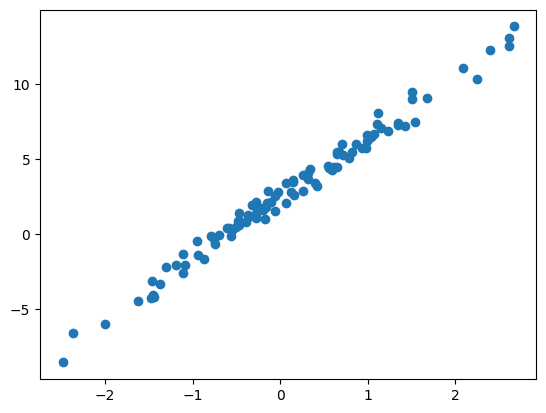

In [5]:
plt.plot(temp,sales,'o')

오늘 바깥의 온도는 0.5도 이다. 아이스 아메라카노를 몇잔정도 만들어 두면
좋을까?

## B. 가짜자료를 만든 방법

`-` 방법1:
$y_i= w_0+w_1 x_i +\epsilon_i = 2.5 + 4x_i +\epsilon_i, \quad i=1,2,\dots,n$

In [6]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
y = 2.5 + 4*x + eps 

In [7]:
x[:5], y[:5]

`-` 방법2: ${\bf y}={\bf X}{\bf W} +\boldsymbol{\epsilon}$

-   ${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}, \quad \boldsymbol{\epsilon}= \begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n\end{bmatrix}$

In [8]:
X = torch.stack([torch.ones(100),x],axis=1)
x = X[:,[1]]
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)

In [9]:
X[:5,:], y[:5,:]

`-` ture와 observed data를 동시에 시각화

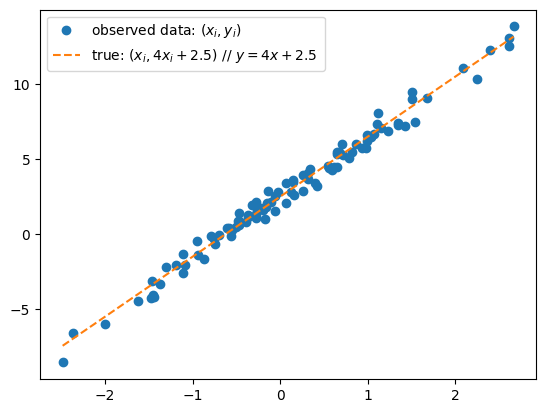

In [10]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$")
plt.plot(x,2.5+4*x,'--',label=r"true: $(x_i, 4x_i+2.5)$ // $y=4x+2.5$ ")
plt.legend()

## C. 회귀분석이란?

`-` 관측한 자료 $(x_i,y_i)$ 가 있음 $\to$ 우리는 $(x_i,y_i)$의 관계를
파악하여 새로운 $x$가 왔을때 그것에 대한 예측값(predicted value)
$\hat{y}$을 알아내는 법칙을 알고 싶음 $\to$ 관계를 파악하기 위해서
$(x_i, y_i)$의 산점도를 그려보니 $x_i$와 $y_i$는 선형성을 가지고 있다는
것이 파악됨 $\to$ 오차항이 등분산성을 가지고 어쩌고 저쩌고… $\to$ 하여튼
$(x_i,y_i)$ 를 **“적당히 잘 관통하는”** 어떠한 하나의 추세선을 잘
추정하면 된다.

`-` 회귀분석이란 산점도를 보고 적당한 추세선을 찾는 것이다. 좀 더
정확하게 말하면 $(x_1,y_1) \dots (x_n,y_n)$ 으로
$\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$ 를 최대한
$\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}$와 비슷하게 찾는 것.

-   given data : $\big\{(x_i,y_i) \big\}_{i=1}^{n}$

-   parameter: ${\bf W}=\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$

-   estimated parameter:
    ${\bf \hat{W}}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$

`-` 더 쉽게 말하면 아래의 그림을 보고 **“적당한”** 추세선을 찾는 것이다.

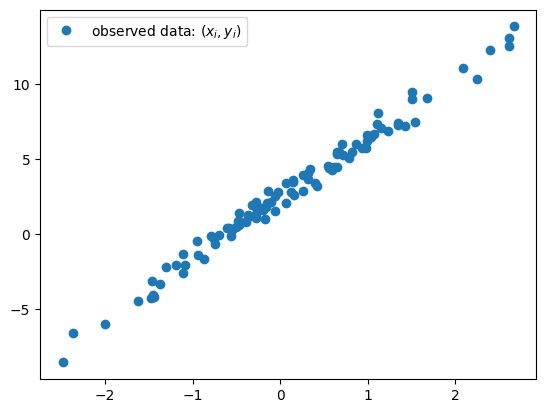

In [11]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$")
plt.legend()

# 4. 손실함수

`# 예제1` – $(\hat{w}_0,\hat{w}_1)=(-5,10)$을 선택하여 선을 그려보고
적당한지 판단해보자

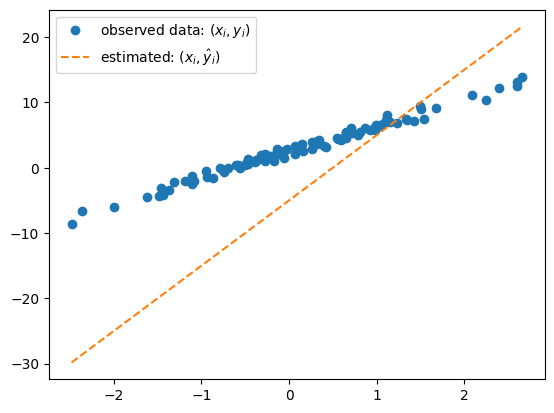

In [12]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--')
What = torch.tensor([[-5.0],[10.0]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`#`

`# 예제2` – $(\hat{w}_0,\hat{w}_1)=(2.5,3.5)$을 선택하여 선을 그려보고
적당한지 판단해보자

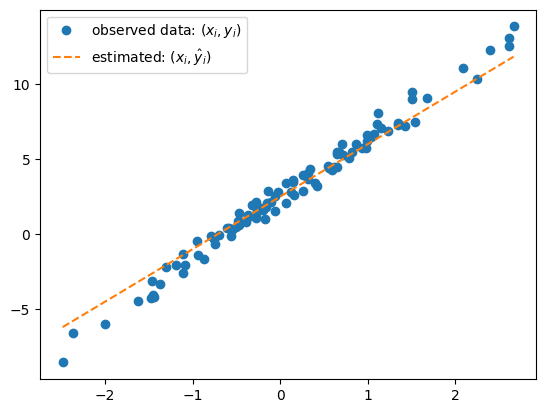

In [13]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--')
What = torch.tensor([[2.5],[3.5]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`#`

`# 예제3` – $(\hat{w}_0,\hat{w}_1)=(2.3,3.5)$을 선택하여 선을 그려보고
적당한지 판단해보자

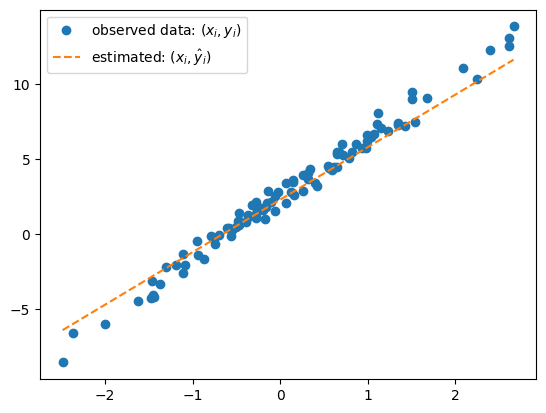

In [14]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--')
What = torch.tensor([[2.3],[3.5]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`#`

`# 예제4` – 예제2의 추세선과 예제3의 추세선 중 뭐가 더 적당한가?

`-` (고민) 왠지 예제2가 더 적당하다고 답해야할 것 같은데.. 육안으로
판단하기 까다롭다..

`-` 적당함을 수식화 할 수 없을까?

`-` “적당한 정도”를 판단하기 위한 장치: loss의 개념 도입

$loss = \sum_{i=1}^{n}(y_i- \hat{y}_i)^2 = \sum_{i=1}^{n}\big(y_i - (\hat{w}_0+\hat{w}_1x_i)\big)^2$

$=({\bf y}-\hat{\bf y})^\top({\bf y}-\hat{\bf y})=({\bf y}-{\bf X}\hat{\bf W})^\top({\bf y}-{\bf X}\hat{\bf W})$

`-` loss의 특징

-   $y_i \approx \hat{y}_i$ 일수록 loss 값이 작음
-   $y_i \approx \hat{y}_i$ 이 되도록 $(\hat{w}_0, \hat{w}_1)$을 작
    찍으면 loss 값이 작음
-   주황색 점선이 “적당할수록” loss 값이 작음 (그럼 우리 의도대로
    된거네?)

`-` loss를 써먹어보자.

In [15]:
What = torch.tensor([[2.5],[3.5]])
print(f"loss: {torch.sum((y - X@What)**2)}")

What = torch.tensor([[2.3],[3.5]])
print(f"loss: {torch.sum((y - X@What)**2)}")

loss: 55.074012756347656
loss: 59.3805046081543

In [16]:
What = torch.tensor([[2.5],[3.5]])
print(f"loss: {(y - X@What).T @ (y - X@What)}")

What = torch.tensor([[2.3],[3.5]])
print(f"loss: {(y - X@What).T @ (y - X@What)}")

loss: tensor([[55.0740]])
loss: tensor([[59.3805]])

`#`

# 5. 파이토치의 반복추정

`-` **추정의 전략 (손실함수도입 + 경사하강법)**

-   1단계: 아무 점선이나 그어본다..
-   2단계: 1단계에서 그은 점선보다 더 좋은 점선으로 바꾼다.
-   3단계: 1-2단계를 반복한다.

## A. 1단계 – 최초의 점선

In [17]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

In [18]:
yhat = X@What 

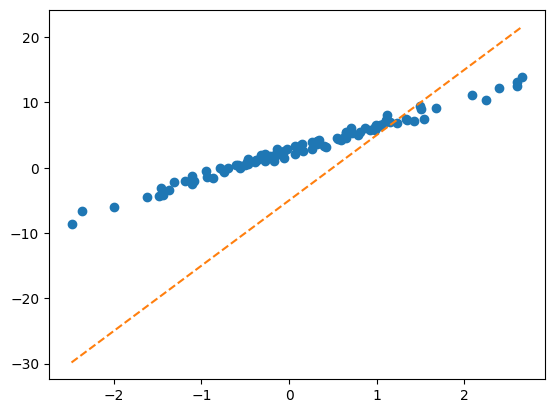

In [19]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--') # 그림을 그리기 위해서 yhat의 미분꼬리표를 제거

## B. 2단계 – update

`-` ’적당한 정도’를 판단하기 위한 장치: loss function 도입!

$$loss=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2=({\bf y}-{\bf\hat{y}})^\top({\bf y}-{\bf\hat{y}})=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$$

`-` loss 함수의 특징: 위 그림의 주황색 점선이 ‘적당할 수록’ loss값이
작다.

In [20]:
loss = torch.sum((y-yhat)**2)
loss

`-` 우리의 목표: 이 loss(=8587.6275)을 더 줄이자.

-   궁극적으로는 아예 모든 조합 $(\hat{w}_0,\hat{w}_1)$에 대하여 가장
    작은 loss를 찾으면 좋겠다.

`-` 문제의 치환: 생각해보니까 우리의 문제는 아래와 같이 수학적으로
단순화 되었다.

-   적당해보이는 주황색 선을 찾자 $\to$ $loss(\hat{w}_0,\hat{w}_1)$를
    최소로하는 $(\hat{w}_0,\hat{w}_1)$의 값을 찾자.

`-` 수정된 목표: $loss(\hat{w}_0,\hat{w}_1)$를 최소로 하는
$(\hat{w}_0,\hat{w}_1)$을 구하라.

-   단순한 수학문제가 되었다. 이것은 마치 $f(x,y)$를 최소화하는
    $(x,y)$를 찾으라는 것임.
-   함수의 최대값 혹은 최소값을 컴퓨터를 이용하여 찾는것을 “최적화”라고
    하며 이는 산공교수님들이 가장 잘하는 분야임. (산공교수님들에게
    부탁하면 잘해줌, 산공교수님들은 보통 최적화해서 어디에 쓸지보다
    최적화 자체에 더 관심을 가지고 연구하심)
-   최적화를 하는 방법? 경사하강법

`#` 경사하강법 아이디어 (1차원)

1.  임의의 점을 찍는다.
2.  그 점에서 순간기울기를 구한다. (접선) \<– 미분
3.  순간기울기(=미분계수)의 부호를 살펴보고 부호와 반대방향으로
    움직인다.

> 팁: 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을 조절한다.
> $\to$ $\alpha$를 도입

> 최종수식:
> $\hat{w} \leftarrow \hat{w} - \alpha \times \frac{\partial}{\partial \hat{w}}loss(\hat{w})$

`#`

`#` 경사하강법 아이디어 (2차원)

![](https://guebin.github.io/DL2024/posts/02wk-1_files/figure-html/cell-37-output-1.png)

1.  임의의 점을 찍는다.
2.  그 점에서 순간기울기를 구한다. (접평면) \<– 편미분
3.  순간기울기(=미분계수)의 부호를 살펴보고 부호와 반대방향으로 각각
    움직인다.

> 팁: 여기서도 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을
> 각각 조절한다. $\to$ $\alpha$를 도입.

`#`

`-` 경사하강법 = **loss를 줄이도록 ${\bf \hat{W}}$를 개선하는 방법**

-   업데이트 공식: 수정값 = 원래값 - $\alpha$ $\times$
    기울어진크기(=미분계수)
-   여기에서 $\alpha$는 전체적인 보폭의 크기를 결정한다. 즉 $\alpha$값이
    클수록 한번의 update에 움직이는 양이 크다.

`-` 발상의 전환: 가만히 보니까 loss는
$\hat{\bf W} =\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$ 에
따라서 값이 바뀌는 함수잖아??? 즉 아래와 같이 생각할 수 있음.

$$ loss(\hat{w}_0,\hat{w}_1) := loss(\hat{\bf W})=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$$

따라서 구하고 싶은것은 아래와 같음

$$\hat{\bf W}^{LSE} = \underset{\bf \hat{W}}{\operatorname{argmin}} ~ loss(\hat{\bf W})$$

> 위의 식은
> $\hat{\bf W} = \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$
> 로 생각해도 무방

`# 경사하강법` – $loss({\bf W})$를 최소로 만드는 ${\bf W}$를 컴퓨터로
구하는 방법, 즉
$\hat{\bf W} := \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$를
구하는 방법을 요약하면 아래와 같다.

`1`. 임의의 점 $\hat{\bf W}$를 찍는다.

`2`. 그 점에서 순간기울기를 구한다. 즉
$\frac{\partial}{\partial {\bf W}}loss({\bf W})$ 를 계산한다.

`3`. $\hat{\bf W}$에서의 순간기울기[1]의 부호를 살펴보고 부호와
반대방향으로 움직인다. 이때 기울기의 절대값 크기[2]와 비례하여
보폭(=움직이는 정도)을 각각 조절한다. 즉 아래의 수식에 따라 업데이트
한다.

$$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss({\bf W})$$

`#`

`-` 여기에서 미분을 어떻게…?? 즉 아래를 어떻게 계산해..?

$$\frac{\partial}{\partial {\bf W}}loss({\bf W}):= \begin{bmatrix} \frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1}\end{bmatrix}loss({\bf W}) =  \begin{bmatrix} \frac{\partial}{\partial w_0}loss({\bf W}) \\ \frac{\partial}{\partial w_1}loss({\bf W})\end{bmatrix} $$

> `loss.backward()`를 실행하면 `What.grad`에 미분값이 업데이트 되어요!

(실행전)

[1] $\frac{\partial}{\partial {\bf W}}loss({\bf W})$

[2] $\left|\frac{\partial}{\partial {\bf W}}loss({\bf W})\right|$

In [21]:
print(What.grad)

None

(실행후)

In [22]:
loss.backward()

In [23]:
print(What.grad)

tensor([[-1342.2524],
        [ 1188.9305]])

`-` 계산결과의 검토 (1)

-   $loss({\bf W})=({\bf y}-\hat{\bf y})^\top ({\bf y}-\hat{\bf y})=({\bf y}-{\bf XW})^\top ({\bf y}-{\bf XW})$

-   $\frac{\partial}{\partial {\bf W}}loss({\bf W})=-2{\bf X}^\top {\bf y}+2{\bf X}^\top {\bf X W}$

In [24]:
- 2 * X.T @ y + 2 * X.T @ X @ What

`-` 계산결과의 검토 (2)

$$\frac{\partial}{\partial {\bf W} } loss({\bf W})=\begin{bmatrix}\frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1} \end{bmatrix}loss({\bf W}) =\begin{bmatrix}\frac{\partial}{\partial w_0}loss(w_0,w_1) \\ \frac{\partial}{\partial w_1}loss(w_0,w_1) \end{bmatrix}$$

를 계산하고 싶은데 벡터미분을 할줄 모른다고 하자. 편미분의 정의를
살펴보면,

$$\frac{\partial}{\partial w_0}loss(w_0,w_1) \approx \frac{loss(w_0+h,w_1)-loss(w_0,w_1)}{h}$$

$$\frac{\partial}{\partial w_1}loss(w_0,w_1) \approx \frac{loss(w_0,w_1+h)-loss(w_0,w_1)}{h}$$

라고 볼 수 있다. 이를 이용하여 근사계산하면

In [25]:
def l(w0,w1):
    return torch.sum((y-w0-w1*x)**2)

In [26]:
l(-5,10), loss # 로스값일치

In [27]:
h=0.001 
(l(-5+h,10) - l(-5,10))/h

In [28]:
h=0.001 
(l(-5,10+h) - l(-5,10))/h

이 값은 `What.grad`에 저장된 값과 거의 비슷하다.

In [29]:
What.grad

`-` 이제 아래의 공식에 넣고 업데이트해보자

$$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss({\bf W})$$

In [30]:
alpha = 0.001 
print(f"{What.data} -- 수정전")
print(f"{-alpha*What.grad} -- 수정하는폭")
print(f"{What.data-alpha*What.grad} -- 수정후")
print(f"{torch.linalg.inv((X.T @ X)) @ X.T @ y} -- 회귀분석으로 구한값")
print(f"{torch.tensor([[2.5],[4]])} -- 참값(이건 비밀~~)")

tensor([[-5.],
        [10.]]) -- 수정전
tensor([[ 1.3423],
        [-1.1889]]) -- 수정하는폭
tensor([[-3.6577],
        [ 8.8111]]) -- 수정후
tensor([[2.4459],
        [4.0043]]) -- 회귀분석으로 구한값
tensor([[2.5000],
        [4.0000]]) -- 참값(이건 비밀~~)

-   alpha를 잘 잡아야함~

`-` 1회 수정결과를 시각화

In [31]:
Wbefore = What.data
Wafter = What.data - alpha * What.grad 
Wbefore, Wafter

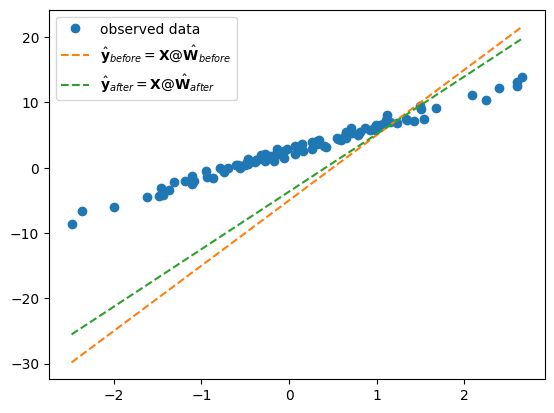

In [32]:
plt.plot(x,y,'o',label=r'observed data')
plt.plot(x,X@Wbefore,'--', label=r"$\hat{\bf y}_{before}={\bf X}@\hat{\bf W}_{before}$")
plt.plot(x,X@Wafter,'--', label=r"$\hat{\bf y}_{after}={\bf X}@\hat{\bf W}_{after}$")
plt.legend()

## C. 3단계 – iteration (=learn = estimate $\bf{\hat W}$)

In [33]:
x = torch.tensor(temp).reshape(-1,1)
ones = torch.ones(100).reshape(-1,1)
X = torch.concat([ones,x],axis=1)
y = torch.tensor(sales).reshape(-1,1)

In [34]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

In [35]:
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    What.grad = None

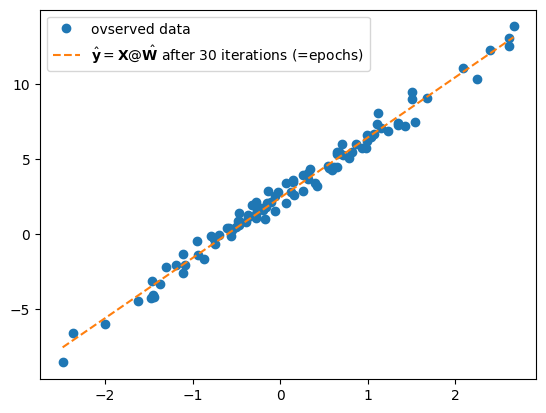

In [36]:
plt.plot(x,y,'o', label = "ovserved data")
plt.plot(x,X@What.data,'--', label = r"$\hat{\bf y}={\bf X}@\hat{\bf W}$ after 30 iterations (=epochs)")
plt.legend()

# 6. 파라메터의 학습과정 음미

## A. 단순무식한 print

In [37]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
print(f"시작값 = {What.data.reshape(-1)}")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    print(f'loss = {loss:.2f} \t 업데이트폭 = {-0.001 * What.grad.reshape(-1)} \t 업데이트결과: {What.data.reshape(-1)}')
    What.grad = None

시작값 = tensor([-5., 10.])
loss = 8587.62   업데이트폭 = tensor([ 1.3422, -1.1889])      업데이트결과: tensor([-3.6578,  8.8111])
loss = 5675.18   업데이트폭 = tensor([ 1.1029, -0.9499])      업데이트결과: tensor([-2.5548,  7.8612])
loss = 3755.63   업데이트폭 = tensor([ 0.9056, -0.7596])      업데이트결과: tensor([-1.6492,  7.1016])
loss = 2489.58   업데이트폭 = tensor([ 0.7431, -0.6081])      업데이트결과: tensor([-0.9061,  6.4935])
loss = 1654.04   업데이트폭 = tensor([ 0.6094, -0.4872])      업데이트결과: tensor([-0.2967,  6.0063])
loss = 1102.33   업데이트폭 = tensor([ 0.4995, -0.3907])      업데이트결과: tensor([0.2028, 5.6156])
loss = 737.85    업데이트폭 = tensor([ 0.4091, -0.3136])      업데이트결과: tensor([0.6119, 5.3020])
loss = 496.97    업데이트폭 = tensor([ 0.3350, -0.2519])      업데이트결과: tensor([0.9469, 5.0501])
loss = 337.72    업데이트폭 = tensor([ 0.2742, -0.2025])      업데이트결과: tensor([1.2211, 4.8477])
loss = 232.40    업데이트폭 = tensor([ 0.2243, -0.1629])      업데이트결과: tensor([1.4453, 4.6848])
loss = 162.73    업데이트폭 = tensor([ 0.1834, -0.1311])      업데이트결과: 

## B. 반복시각화 – yhat의 관점에서!

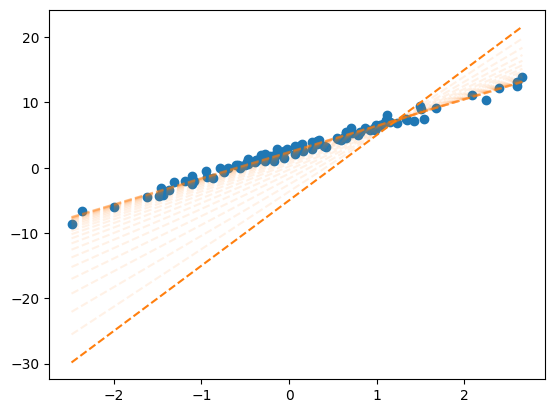

In [38]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
fig = plt.plot(x,y,'o',label = "observed")
plt.plot(x,X@What.data,'--',color="C1")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    plt.plot(x,X@What.data,'--',color="C1",alpha=0.1)
    What.grad = None

## C. 반복시각화 – loss의 관점에서!!

In [39]:
def plot_loss():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax.azim = 30  ## 3d plot의 view 조절 
    ax.dist = 8   ## 3d plot의 view 조절 
    ax.elev = 5   ## 3d plot의 view 조절 
    ax.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    return fig

In [40]:
l(-5,10)

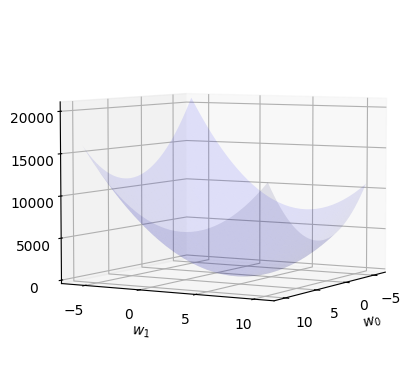

In [41]:
fig = plot_loss()

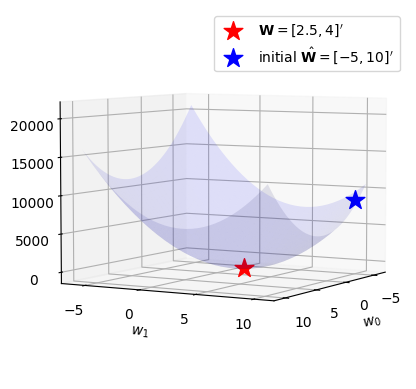

In [42]:
fig = plot_loss()
ax = fig.gca()
ax.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
ax.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue', label=r"initial $\hat{\bf W}=[-5, 10]'$")
ax.legend()

In [43]:
w0,w1 = What.data.reshape(-1)

In [44]:
What.data

In [45]:
w0,w1

In [46]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    w0,w1 = What.data.reshape(-1) 
    ax.scatter(w0,w1,l(w0,w1),s=5,marker='o',color='blue')
    What.grad = None

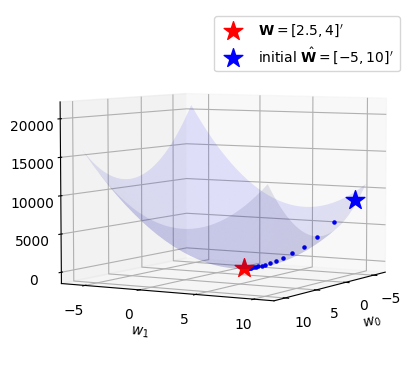

In [47]:
fig

## D. 애니메이션

In [48]:
from matplotlib import animation

In [49]:
plt.rcParams['figure.figsize'] = (7.5,2.5)
plt.rcParams["animation.html"] = "jshtml" 

In [50]:
def show_animation(alpha=0.001):
    ## 1. 히스토리 기록을 위한 list 초기화
    loss_history = [] 
    yhat_history = [] 
    What_history = [] 

    ## 2. 학습 + 학습과정기록
    What= torch.tensor([[-5.0],[10.0]],requires_grad=True)
    What_history.append(What.data.tolist())
    for epoc in range(30): 
        yhat=X@What ; yhat_history.append(yhat.data.tolist())
        loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
        loss.backward() 
        What.data = What.data - alpha * What.grad; What_history.append(What.data.tolist())
        What.grad = None    

    ## 3. 시각화 
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    #### ax1: yhat의 관점에서.. 
    ax1.plot(x,y,'o',label=r"$(x_i,y_i)$")
    line, = ax1.plot(x,yhat_history[0],label=r"$(x_i,\hat{y}_i)$") 
    ax1.legend()
    #### ax2: loss의 관점에서.. 
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax2.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax2.azim = 30  ## 3d plot의 view 조절 
    ax2.dist = 8   ## 3d plot의 view 조절 
    ax2.elev = 5   ## 3d plot의 view 조절 
    ax2.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax2.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax2.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax2.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    ax2.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
    ax2.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue')
    ax2.legend()
    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(What_history)[epoc,0],np.array(What_history)[epoc,1],loss_history[epoc],color='grey')
        fig.suptitle(f"alpha = {alpha} / epoch = {epoc}")
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

> epoch = 0 부터 시작하여 시작점에서 출발하도록 애니메이션을
> 수정했습니당.

In [51]:
ani = show_animation(alpha=0.001)
ani

## E. 학습률에 따른 시각화

`-` $\alpha$가 너무 작다면 비효율적임

In [52]:
show_animation(alpha=0.0001)

`-` $\alpha$가 크다고 무조건 좋은건 또 아님

In [53]:
show_animation(alpha=0.0083)

`-` 수틀리면 수렴안할수도??

In [54]:
show_animation(alpha=0.0085)

`-` 그냥 망할수도??

In [55]:
show_animation(alpha=0.01)